## Estimating True COVID-19 Prevalence

Description


In [3]:
import sys
# Install required packages
!{sys.executable} -mpip -q install matplotlib seaborn statsmodels pandas publicdata metapack

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import metapack as mp
import rowgenerators as rg
import publicdata as pub
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

http://www.robertkubinec.com/post/kubinec_model_draft/
http://systrom.com/


Li, Ruiyun, et al (1) " We estimate 86% of all infections were undocumented (95% CI: [82%–90%]) prior to 23 January 2020 travel restrictions." Kubinec (2), using a statistical model estimates that about 88% of infections are undocumented. 

Dawei et all (3) report that the median times from first symptoms to major events are: 
<table>
    <tr>
        <th>Event</th>
        <th>Time (Days)</th>
        <th>From</th>
    </tr>
    <tr>
        <td>dyspnea</td>
        <td>5.0</td>
        <td>onset of symptoms</td>
    </tr>
    <tr>
        <td>hospital admission</td>
        <td>7.0</td>
        <td>onset of symptoms</td>
    </tr>
    <tr>
        <td>ARDS</td>
        <td>8.0</td>
        <td>onset of symptoms</td>
    </tr>
    <tr>
        <td>hospital discharge</td>
        <td>10 (IQR 7.0-14.0)</td>
        <td>from addmission</td>
</table>

 Linton, Natalie M., et al. (5) reports, for cases in Wuhan, China, : 
 
 <table>
    <tr>
        <th>From</th>
        <th>To</th>
        <th>Time (Days)</th>
    </tr>
    <tr>
        <td>Exposure</td>
        <td>Infection or onset? (Incubation Period)</td>
        <td>5 (95% CI 2-14)
    </tr>
    <tr>
        <td>onset</td>
        <td>Hospitalization</td>
        <td>3-4 no truncation, 5-9 right truncation.</td>
    </tr>
    <tr>
        <td>onset</td>
        <td>death</td>
        <td>13 / 17 right truncation (95% CI 13.5 24.1)</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
    </tr>
</table>

Wilson (4) reports: 
    
> We estimated the case-fatality risk for 2019 novel coronavirus disease cases in China (3.5%); China, excluding Hubei Province (0.8%); 82 countries, territories, and areas (4.2%); and on a cruise ship (0.6%). Lower estimates might be closest to the true value, but a broad range of 0.25%-3.0% probably should be considered. 
  
Wilson estimates the case fatality rate at 0.25% to 3.0%.
    
For this study, we'll use these parameters: 

* Exposure to onset: 5 days ( 95%CI 2-14)
* Onset to hospitalization: 5 days
* Onset to death: 17 days, (95% CI 13.5 24.1)
    
    

# References

1: Li, Ruiyun, et al. “[Substantial Undocumented Infection Facilitates the Rapid Dissemination of Novel Coronavirus (SARS-CoV2).](https://science.sciencemag.org/content/sci/early/2020/03/13/science.abb3221.full.pdf)” Science, Mar. 2020, p. eabb3221. DOI.org (Crossref), doi:10.1126/science.abb3221.

2: Kubinec, Robert. A Proposed Model for Partial Identification of SARS-CoV2 Infection Rates Given Observed Tests and Cases. http://www.robertkubinec.com/post/kubinec_model_draft/. Accessed 28 Mar. 2020.

3: Wang, Dawei, et al. “[Clinical Characteristics of 138 Hospitalized Patients With 2019 Novel Coronavirus–Infected Pneumonia in Wuhan, China.](https://jamanetwork.com/journals/jama/articlepdf/2761044/jama_wang_2020_oi_200019.pdf)” JAMA, vol. 323, no. 11, Mar. 2020, pp. 1061–69, doi:10.1001/jama.2020.1585.

4: Nick Wilson, et al. “[Case-Fatality Risk Estimates for COVID-19 Calculated by Using a Lag Time for Fatality.](https://wwwnc.cdc.gov/eid/article/26/6/20-0320_article)” Emerging Infectious Disease Journal, vol. 26, no. 6, 2020, doi:10.3201/eid2606.200320.

5: Linton, Natalie M., et al. “[Incubation Period and Other Epidemiological Characteristics of 2019 Novel Coronavirus Infections with Right Truncation: A Statistical Analysis of Publicly Available Case Data.](https://www.mdpi.com/2077-0383/9/2/538)” Journal of Clinical Medicine, vol. 9, no. 2, 2, Multidisciplinary Digital Publishing Institute, Feb. 2020, p. 538. www.mdpi.com, doi:10.3390/jcm9020538.
    5a: Support tables: http://www.mdpi.com/2077-0383/9/2/538/s1



(13.091523815567717, 23.926117904908672)


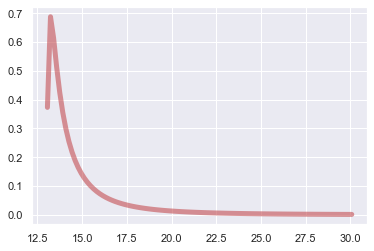

In [30]:
from scipy.stats import lognorm

fig, ax = plt.subplots(1, 1)
s = 1.22
l = 13
x = np.linspace(lognorm.ppf(0.01, s=s, loc=l),
                lognorm.ppf(0.99, s=s, loc=l), 100)
y = lognorm.pdf(x, s=s, loc=l)
ax.plot(x, y,'r-', lw=5, alpha=0.6, label='lognorm pdf')
print(lognorm.interval(.95, s, loc=l, scale=1))

(0.6126319102145892, 1.6323015228666846)


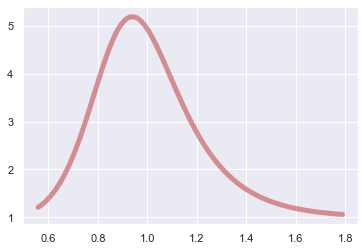

In [33]:
fig, ax = plt.subplots(1, 1)
s = .25
l = 0
x = np.linspace(lognorm.ppf(0.01, s=s, loc=l),
                lognorm.ppf(0.99, s=s, loc=l), 100)
y = lognorm.pdf(x, s=s, loc=l)
ax.plot(x, np.exp(y),'r-', lw=5, alpha=0.6, label='lognorm pdf')
print(lognorm.interval(.95, s, loc=l, scale=1))